<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1d8lmQCL40i0rGj_qMFjj5dUXdQYR_ixe" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

---

# **Licencia**

**Autor**: Juan Francisco Puentes Calvo

**Licencia**: GPL v3 (https://www.gnu.org/licenses/gpl-3.0.html)


# **Reconocimientos**

* Ninguno, por ahora.

---

## Identificaci√≥n de objetos (GPU)

error: externally-managed-environment

√ó This environment is externally managed
‚ï∞‚îÄ> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the 

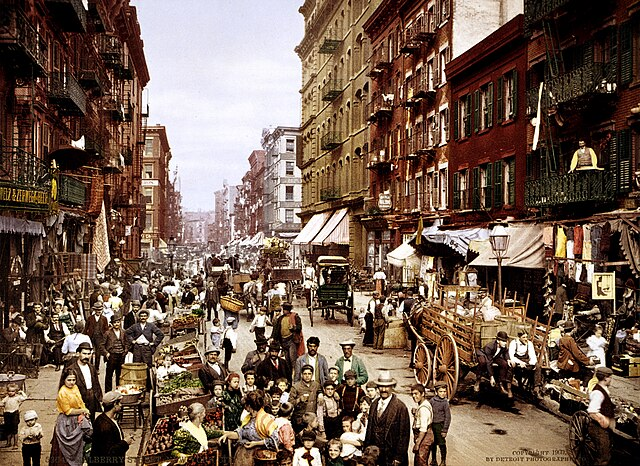


image 1/1 /home/roberto/GitClones/eia/pria/vision/data/image.jpg: 480x640 12 persons, 1161.8ms
Speed: 1.5ms preprocess, 1161.8ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)
Coordenadas: tensor([[364.0872, 370.9476, 410.5723, 465.7780]])
ID de clase: tensor([0.])
Score: tensor([0.5986])

Coordenadas: tensor([[409.2825, 383.1328, 433.8698, 466.0000]])
ID de clase: tensor([0.])
Score: tensor([0.5817])

Coordenadas: tensor([[427.5295, 381.1416, 451.6563, 465.9686]])
ID de clase: tensor([0.])
Score: tensor([0.5161])

Coordenadas: tensor([[293.0505, 336.0190, 329.4248, 386.5291]])
ID de clase: tensor([0.])
Score: tensor([0.4685])

Coordenadas: tensor([[ 17.2176, 409.7812,  43.2844, 465.9221]])
ID de clase: tensor([0.])
Score: tensor([0.4599])

Coordenadas: tensor([[ 48.1452, 371.2222,  92.5168, 466.0000]])
ID de clase: tensor([0.])
Score: tensor([0.4239])

Coordenadas: tensor([[ 89.9402, 390.4515, 132.3834, 464.6889]])
ID de clase: tensor([0.])
Score: tensor([0.3820])



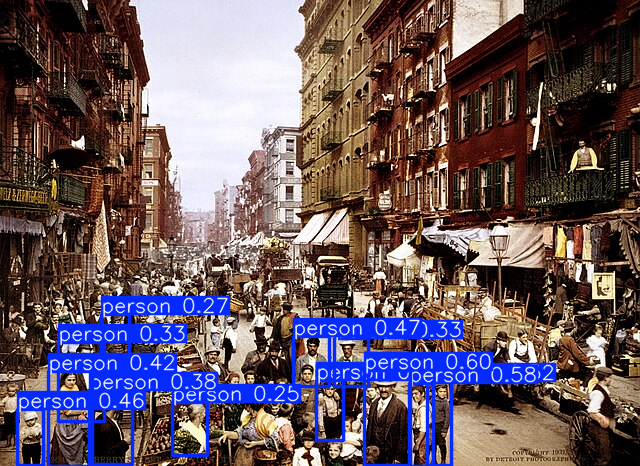

In [4]:
# prompt: dada una imagen referenciada mediabte una url, descargala, muestrala y, empleando yolo v8, muestra las identificaciones que ha hecho (localizaci√≥n, id y core) para finalmente mostrar la imagen con las identificaciones rotuladas.

!pip -q install ultralytics

import PIL
from IPython.display import Image, display
from ultralytics import YOLO
'''
# URL de la imagen
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/NYC_Mulberry_Street_3g04637u.jpg/640px-NYC_Mulberry_Street_3g04637u.jpg"
#image_url = "https://raw.github.com/FranPuentes/iTI2025/main/data/traffic.jpg"

# Descargar la imagen
!wget -q {image_url} -O data/image.jpg
'''
# Mostrar la imagen descargada
display(Image(filename='data/image.jpg'))

# Cargar el modelo YOLOv8
model = YOLO('data/yolov8x.pt')

# Realizar la detecci√≥n de objetos
results = model('data/image.jpg')

# Mostrar las detecciones (localizaci√≥n, ID y score)
for r in results:
  for box in r.boxes:
    print(f"Coordenadas: {box.xyxy}")
    print(f"ID de clase: {box.cls}")
    print(f"Score: {box.conf}\n")

# Mostrar la imagen con las etiquetas
# NOTA: esta parte fue a√±adida a mano, el original intercambiaba los canales Red y Blue.
image=PIL.Image.fromarray(results[0].plot())
image = image.convert("RGB")
r, g, b = image.split()
image = PIL.Image.merge("RGB", (b, g, r))
image


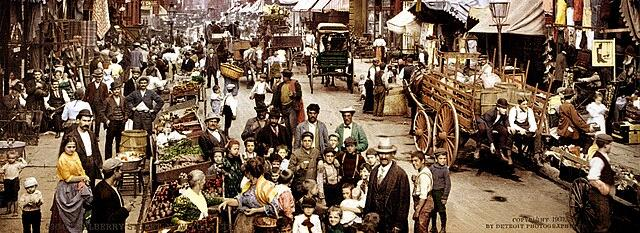


image 1/1 /home/roberto/GitClones/eia/pria/vision/data/cropped_image.jpg: 256x640 12 persons, 629.2ms
Speed: 1.0ms preprocess, 629.2ms inference, 3.2ms postprocess per image at shape (1, 3, 256, 640)
Coordenadas: tensor([[362.7546, 138.5987, 410.4313, 232.8205]])
ID de clase: tensor([0.])
Score: tensor([0.6566])

Coordenadas: tensor([[409.3051, 150.2953, 434.1228, 232.8103]])
ID de clase: tensor([0.])
Score: tensor([0.5731])

Coordenadas: tensor([[586.8230, 131.9948, 616.2300, 231.7139]])
ID de clase: tensor([0.])
Score: tensor([0.4998])

Coordenadas: tensor([[ 47.9995, 154.1860,  92.6455, 232.8652]])
ID de clase: tensor([0.])
Score: tensor([0.4865])

Coordenadas: tensor([[428.0404, 149.3771, 451.6206, 232.7271]])
ID de clase: tensor([0.])
Score: tensor([0.4635])

Coordenadas: tensor([[ 88.0695, 157.0499, 130.9942, 232.3851]])
ID de clase: tensor([0.])
Score: tensor([0.4088])

Coordenadas: tensor([[ 18.9102, 176.0732,  43.5479, 232.7700]])
ID de clase: tensor([0.])
Score: tensor([0.39

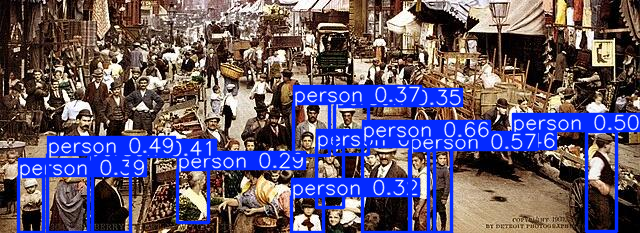

In [5]:
# prompt: En la imagen anterior (en el fichero image.jpg), hacer un zoom en la mitad inferior y volver a hacer la predicc√≥n, mostrando los resultados y la imagen con las identificaciones.

# Recortar la imagen (mitad inferior)
image = PIL.Image.open('data/image.jpg')
width, height = image.size
cropped_image = image.crop((0, height // 2, width, height))
cropped_image.save('data/cropped_image.jpg')

# Mostrar la imagen recortada
display(Image(filename='data/cropped_image.jpg'))

# Realizar la detecci√≥n de objetos en la imagen recortada
results = model('data/cropped_image.jpg')

# Mostrar las detecciones (localizaci√≥n, ID y score)
for r in results:
  for box in r.boxes:
    print(f"Coordenadas: {box.xyxy}")
    print(f"ID de clase: {box.cls}")
    print(f"Score: {box.conf}\n")

# Mostrar la imagen recortada con las etiquetas
image=PIL.Image.fromarray(results[0].plot())
image = image.convert("RGB")
r, g, b = image.split()
image = PIL.Image.merge("RGB", (b, g, r))
image


## Entrenando modelos de identificaci√≥n de objetos

### Reconocimiento de formas

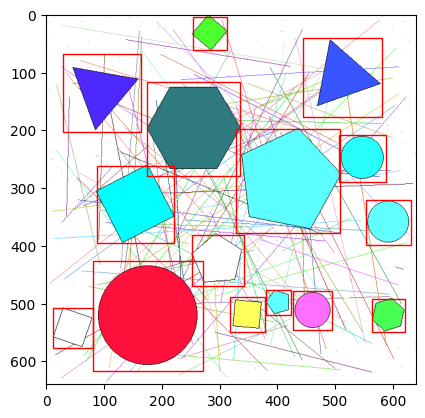

In [6]:
# prompt: Dado el fichero .zip referenciado con la url https://raw.github.com/FranPuentes/iTI2025/main/data/gshapes.zip, desc√°rgalo, √°brelo y escoge aleatoriamente un fichero .png y su pareja .txt que tienen el mismo nombre en el subdirectorio "train". Dibuja la imagen y la misma con las identificaciones (formato yolo) que contiene el fichero .txt.

import zipfile
import random
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Descargar el fichero .zip
#!wget -q https://raw.github.com/FranPuentes/iTI2025/main/data/gshapes.zip --no-clobber -O gshapes.zip

# Abrir el fichero .zip
with zipfile.ZipFile('gshapes.zip', 'r') as zip_ref:
  zip_ref.extractall('.')

# Escoger aleatoriamente un fichero .png y su pareja .txt
train_dir = 'gshapes/train'
png_files = [f for f in os.listdir(train_dir) if f.endswith('.png')]
random_file = random.choice(png_files)
txt_file = random_file.replace('.png', '.txt')

# Dibujar la imagen
image_path = os.path.join(train_dir, random_file)
image = plt.imread(image_path)
fig, ax = plt.subplots(1)
ax.imshow(image)

# Dibujar las identificaciones
txt_path = os.path.join(train_dir, txt_file)
with open(txt_path, 'r') as f:
  lines = f.readlines()
for line in lines:
  class_id, x_center, y_center, width, height = map(float, line.strip().split())
  x_min = (x_center - width / 2) * image.shape[1]
  y_min = (y_center - height / 2) * image.shape[0]
  width = width * image.shape[1]
  height = height * image.shape[0]
  rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
  ax.add_patch(rect)

plt.show()


In [7]:
# prompt: Instala con pip la librer√≠a Ultralytics y entrena un modelo YOLO v8 usando el contenido del .zip indicado. Al finalizar muestra una matriz de confusi√≥n con su evaluaci√≥n. No hagas llamadas a la l√≠nea de comandos.

# Instalar Ultralytics (si no est√° ya instalado)
!pip -q install ultralytics

import matplotlib.pyplot as plt

# Entrenar el modelo YOLOv8
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # Cargar un modelo pre-entrenado (opcional)
results = model.train(data='./gshapes.zip', epochs=1)  # Ajustar epochs seg√∫n sea necesario


error: externally-managed-environment

√ó This environment is externally managed
‚ï∞‚îÄ> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the 

array([[        122,           0,           0,           0,           0,           0],
       [          0,          69,          15,           0,           0,          53],
       [          0,          38,          23,           0,           0,          17],
       [          0,           0,           1,          54,          40,          43],
       [          0,           0,           3,          26,          27,          87],
       [        157,         187,         251,         189,         223,           0]])

/tmp/ipykernel_14140/3829775937.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + ['1', '3', '4', '5', '6', 'fondo'])
/tmp/ipykernel_14140/3829775937.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + ['1', '3', '4', '5', '6', 'fondo'])


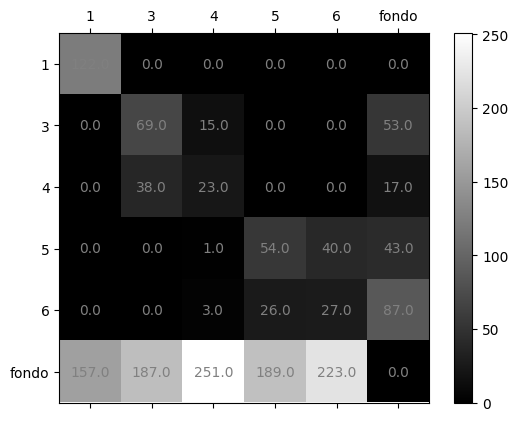

In [8]:
import numpy as np;

confusion_matrix = results.confusion_matrix.matrix

display(confusion_matrix);

# Crear la figura y el eje
fig, ax = plt.subplots()

# Crear la imagen de la matriz de confusi√≥n
cax = ax.matshow(confusion_matrix, cmap=plt.cm.gray)

# Agregar una barra de color
fig.colorbar(cax)

# Establecer las etiquetas de los ejes
ax.set_xticklabels([''] + ['1', '3', '4', '5', '6', 'fondo'])
ax.set_yticklabels([''] + ['1', '3', '4', '5', '6', 'fondo'])

# Mostrar los valores en la matriz
for (i, j), val in np.ndenumerate(confusion_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center', color='grey')

# Mostrar la imagen
plt.show()

In [ ]:
# prompt: Genera un interface gradio que usando el modelo entrenado anteriormente, nos permita dibujar una figura y hacer la predicci√≥n de que figura es. Tambi√©n deber√≠a permitir subir una imagen y aplicarle la predicci√≥n del modelo.

!pip -q install gradio
!pip -q install tensorflow

import gradio as gr
import cv2
import numpy as np
from PIL import Image
# import tensorflow as tf

# Funci√≥n de predicci√≥n
def predict_digit(data):
    image = data["composite"].convert('L')
    results = model.predict(image,conf=0.25)
    return results[0].plot(font_size=7)

# Crear la interfaz de Gradio
interface = gr.Interface(
    fn=predict_digit,  # Funci√≥n que se llama cuando se hace una predicci√≥n
    inputs=gr.ImageEditor(image_mode='L', type="pil", canvas_size=(20*20, 20*20), sources=["upload"], layers=False),
    outputs=[gr.Image()],
    live=False
)

# Mostrar la interfaz
interface.launch(debug=True, share=False)

error: externally-managed-environment

√ó This environment is externally managed
‚ï∞‚îÄ> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the 


0: 640x640 (no detections), 167.8ms
Speed: 5.5ms preprocess, 167.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 157.5ms
Speed: 7.3ms preprocess, 157.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 169.4ms
Speed: 6.1ms preprocess, 169.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 188.6ms
Speed: 30.8ms preprocess, 188.6ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 224.5ms
Speed: 45.7ms preprocess, 224.5ms inference, 9.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 261.2ms
Speed: 46.3ms preprocess, 261.2ms inference, 13.3ms postprocess per image at shape (1, 3, 640, 640)
